In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.1. Summary Stats/1.2.1. Baseline Analysis/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/1. Compartment Analysis/1.1. Summary Stats/1.2.1. Baseline Analysis/Output')

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
data_df <- data.frame(read_excel("CytokineData_102920.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,E_C_F_002,IFNg,17.642316,4.220509,NELF,1,NS,NS_1
2,E_C_F_002,IL10,2.873724,1.953721,NELF,1,NS,NS_1
3,E_C_F_002,IL12p70,1.625272,1.392467,NELF,1,NS,NS_1
4,E_C_F_002,IL13,36.117692,5.214035,NELF,1,NS,NS_1
5,E_C_F_002,IL1b,104.409217,6.719857,NELF,1,NS,NS_1
6,E_C_F_002,IL6,21.159536,4.469856,NELF,1,NS,NS_1


In [7]:
get_cytokine_conc = function(compartment, protein){
    #obtaining concentration values for cytokines in each compartment for nonsmokers only
    mean_sd_df = data_df %>%
        filter(Group == 'NS', Compartment == compartment, Protein == protein) %>%
        summarize(Mean = mean(Conc_pslog2), SD = sd(Conc_pslog2))
  
    return(mean_sd_df)
}

#getting unique cytokine names/ compartments to be able to loop through
unique_compartments = unique(data_df$Compartment)
unique_cytokines = unique(data_df$Protein)

baseline_df = data.frame()
for (i in 1:length(unique_compartments)){
    for (j in 1:length(unique_cytokines)){
        #calling fn
        mean_sd_df = get_cytokine_conc(unique_compartments[i], unique_cytokines[j])
        baseline_df = rbind(baseline_df, data.frame(Compartment = unique_compartments[i], Cytokine = unique_cytokines[j], mean_sd_df))
    }
}

# #reordering each of the factors
baseline_df$Compartment = factor(baseline_df$Compartment, levels = c('NLF', 'NELF', 'Sputum', 'Serum'))
baseline_df$Cytokine = factor(baseline_df$Cytokine, levels = c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg',
                                                               'IL10','IL12p70','IL13','IL17B','IL17D','IL1b',
                                                               'IL4','IL6','IL8','IP10','ITAC','MCP1','MIG',
                                                               'MIP1a','MIP1b','TARC','TNFa'))
head(baseline_df)

,Compartment,Cytokine,Mean,SD
,<fct>,<fct>,<dbl>,<dbl>
1,NELF,IFNg,2.668355,1.3642253
2,NELF,IL10,1.607804,0.6948534
3,NELF,IL12p70,1.250308,0.8115230
4,NELF,IL13,4.007122,1.4353270
5,NELF,IL1b,6.051399,1.4291525
6,NELF,IL6,3.787619,1.4100315


In [9]:
#also splitting dataframes by compartment for easier plotting
split_df = baseline_df %>%
    group_by(Compartment) %>%
    group_split

NLF_df = split_df[[1]]
NELF_df = split_df[[2]]
Sputum_df = split_df[[3]]
Serum_df = split_df[[4]]

# Figure 1

Plotting averages and standard deviations of baseline concentration values by compartment.

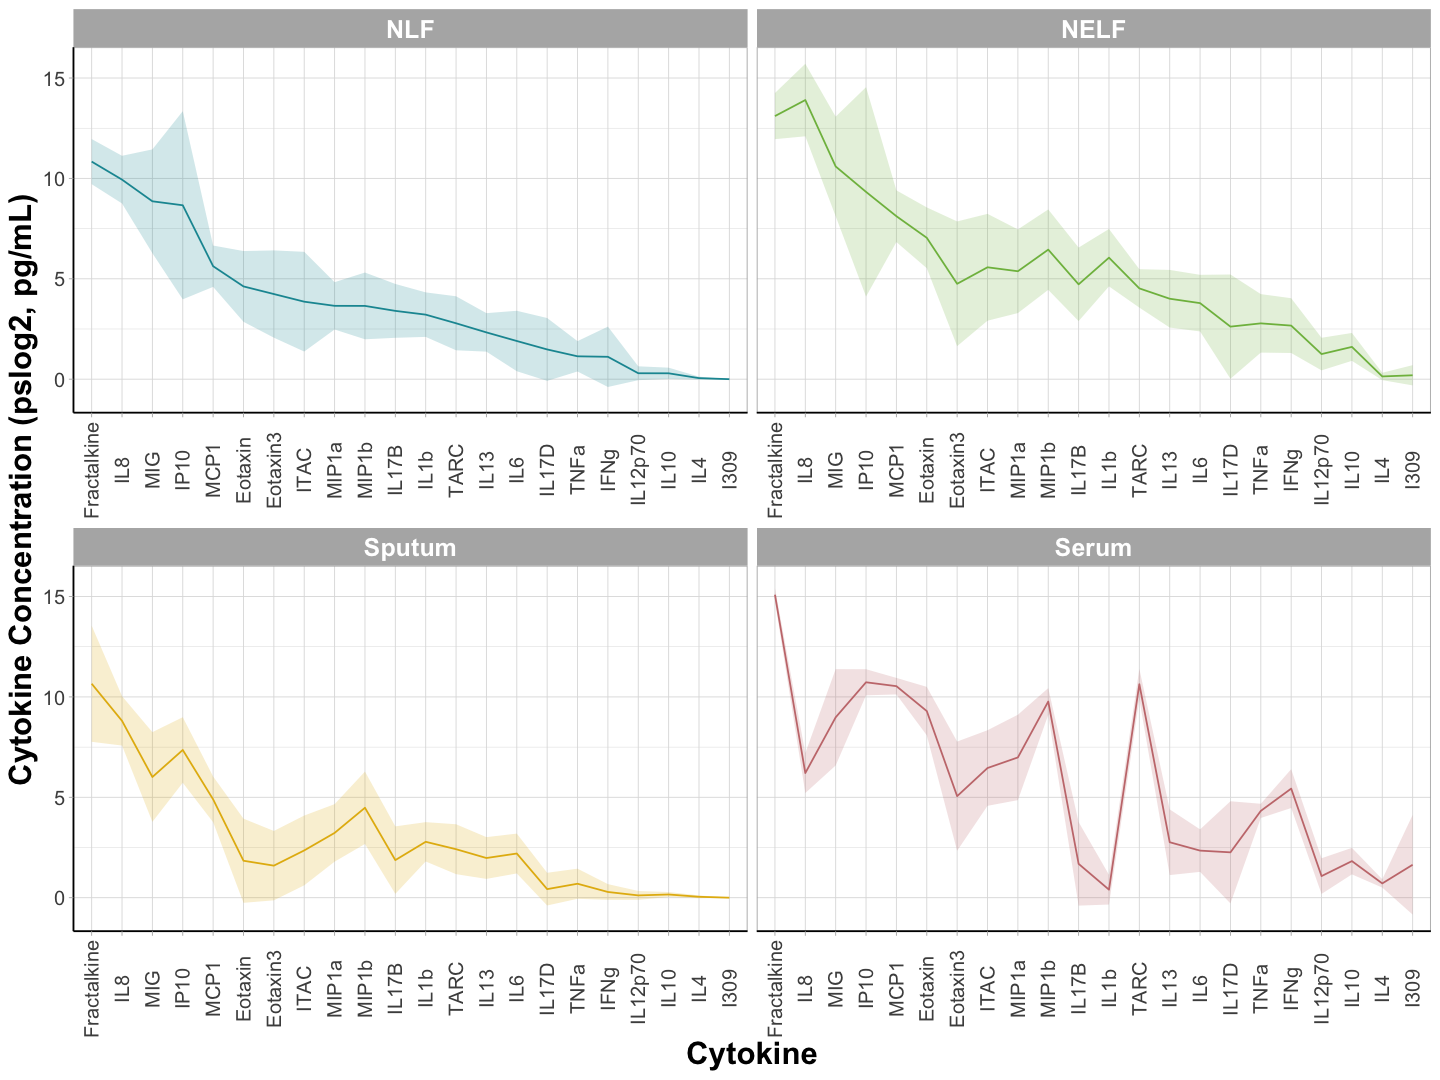

In [18]:
options(repr.plot.width=12, repr.plot.height=9) #changing size
cytokines = factor(baseline_df$Cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 
Figure_1bV2 = ggplot(data = baseline_df) + 
  geom_line(aes(x = cytokines, y = as.numeric(Mean), group = 1,color = Compartment)) +
  geom_ribbon(aes(x = cytokines, y = Mean, ymin = Mean - SD, ymax = Mean + SD, group = 1, fill = Compartment), alpha = 0.2) +
  
  facet_wrap(~ Compartment, scales = 'free_x') + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none", #removing legend
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (pslog2, pg/mL)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) +
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) 
Figure_1bV2

In [12]:
ggsave(Figure_1bV2, 
       filename = 'Figure1bV2.pdf',
       path = Output,
       width = 12, height = 9)

# Figure S1

Visualizes median and standard deviation of cytokine concentrations by compartment. 

In [20]:
get_cytokine_conc = function(compartment, protein){
    #obtaining concentration values for cytokines in each compartment for nonsmokers only
    median_sd_df = data_df %>%
        filter(Group == 'NS', Compartment == compartment, Protein == protein) %>%
        summarize(Median = median(Conc_pslog2), SD = sd(Conc_pslog2))
  
    return(median_sd_df)
}

#getting unique cytokine names/ compartments to be able to loop through
unique_compartments = unique(data_df$Compartment)
unique_cytokines = unique(data_df$Protein)

baseline_df = data.frame()
for (i in 1:length(unique_compartments)){
    for (j in 1:length(unique_cytokines)){
        #calling fn
        median_sd_df = get_cytokine_conc(unique_compartments[i], unique_cytokines[j])
        baseline_df = rbind(baseline_df, data.frame(Compartment = unique_compartments[i], Cytokine = unique_cytokines[j], median_sd_df))
    }
}

# #reordering each of the factors
baseline_df$Compartment = factor(baseline_df$Compartment, levels = c('NLF', 'NELF', 'Sputum', 'Serum'))
baseline_df$Cytokine = factor(baseline_df$Cytokine, levels = c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg',
                                                               'IL10','IL12p70','IL13','IL17B','IL17D','IL1b',
                                                               'IL4','IL6','IL8','IP10','ITAC','MCP1','MIG',
                                                               'MIP1a','MIP1b','TARC','TNFa'))
head(baseline_df)

,Compartment,Cytokine,Median,SD
,<fct>,<fct>,<dbl>,<dbl>
1,NELF,IFNg,2.798469,1.3642253
2,NELF,IL10,1.801183,0.6948534
3,NELF,IL12p70,1.351350,0.8115230
4,NELF,IL13,4.223383,1.4353270
5,NELF,IL1b,6.196162,1.4291525
6,NELF,IL6,3.814106,1.4100315


In [22]:
#also splitting dataframes by compartment for easier plotting
split_df = baseline_df %>%
    group_by(Compartment) %>%
    group_split

NLF_df = split_df[[1]]
NELF_df = split_df[[2]]
Sputum_df = split_df[[3]]
Serum_df = split_df[[4]]

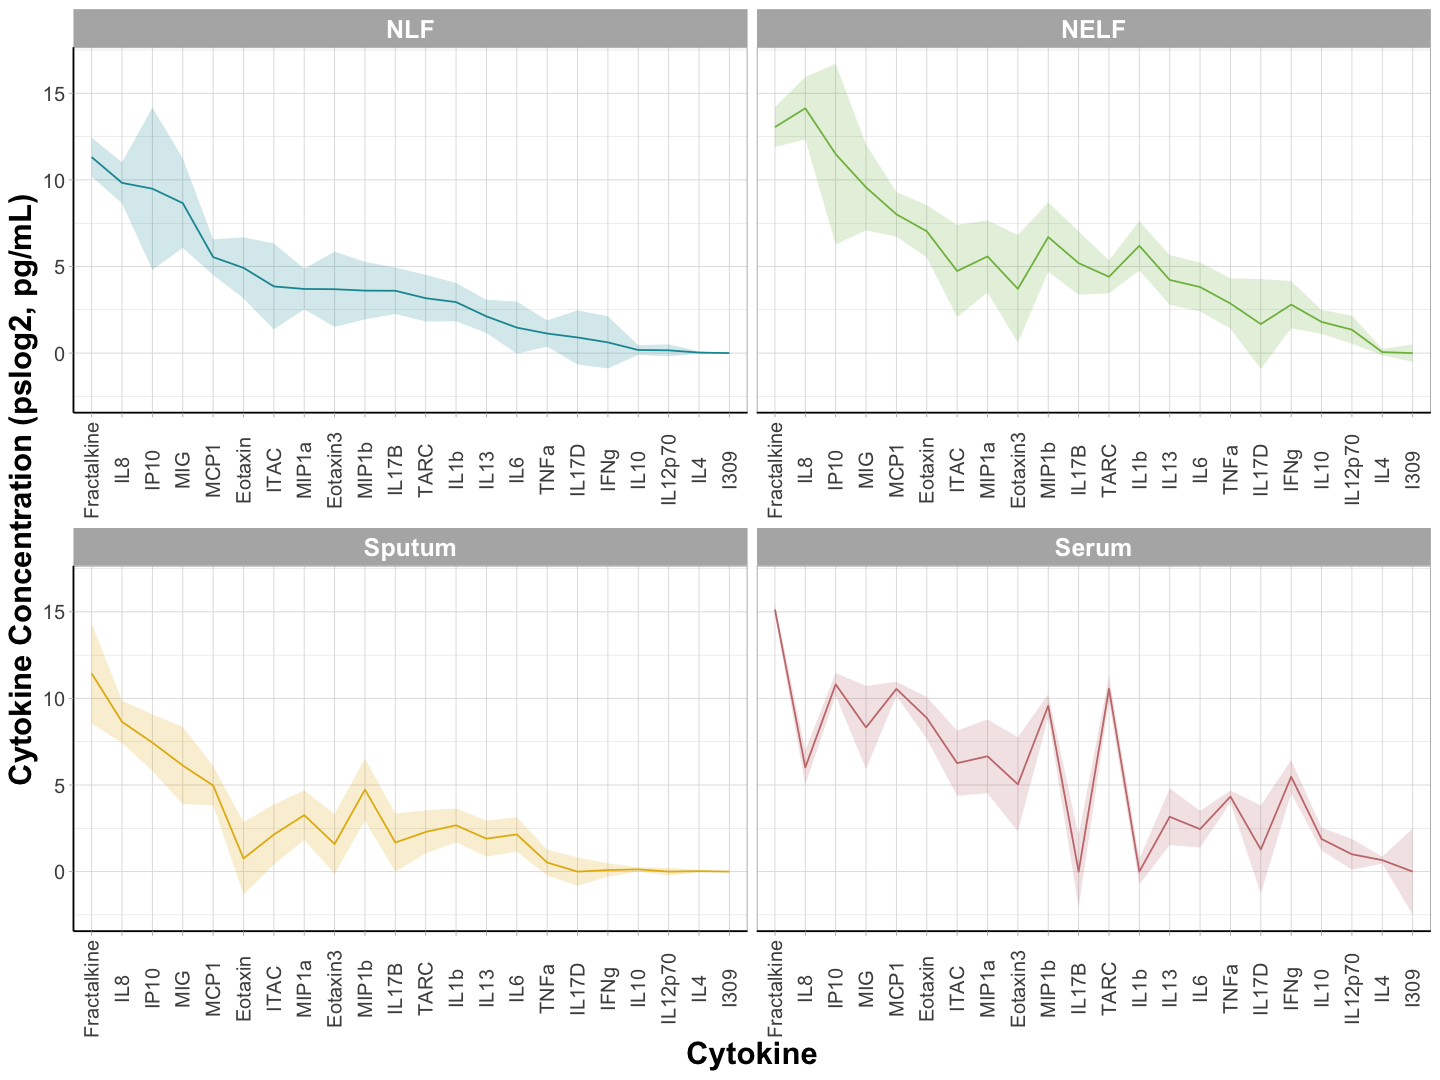

In [24]:
options(repr.plot.width=12, repr.plot.height=9) #changing size
descending_cytokines = unique_cytokines[order(-NLF_df$Median)]
cytokines = factor(baseline_df$Cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 

supplemtental_Median_figure = ggplot(baseline_df) + 
  geom_line(aes(x = cytokines, y = as.numeric(Median), group = 1,color = Compartment)) +
  geom_ribbon(aes(x = cytokines, y = Median, ymin = Median - SD, ymax = Median + SD, group = 1, fill = Compartment), alpha = 0.2) +
  
  facet_wrap(~Compartment, scales = 'free_x') + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        #legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.position = "none", #removing legend
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (pslog2, pg/mL)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) +
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) 
supplemtental_Median_figure

In [19]:
ggsave(supplemtental_median_figure, 
       filename = 'FigureS1.pdf',
       path = Output,
       width = 12, height = 9)

# Shapiro-Wilk’s test

- Shapiro-Wilk's method to test for normality
- if p-value > 0.05, the distribution of the data are not significantly different from normal distribution; in other words, we can assume the normality if p>0.05

In [14]:
NLF_shapiro_test = shapiro.test(NLF_df$mean) 
ELF_shapiro_test = shapiro.test(ELF_df$mean) #normally distributed
Sputum_shapiro_test = shapiro.test(Sputum_df$mean) 
Serum_shapiro_test = shapiro.test(Serum_df$mean) #normally distributed

In [15]:
print(NLF_shapiro_test)
print(ELF_shapiro_test)
print(Sputum_shapiro_test)
print(Serum_shapiro_test)


	Shapiro-Wilk normality test

data:  NLF_df$mean
W = 0.88595, p-value = 0.01572


	Shapiro-Wilk normality test

data:  ELF_df$mean
W = 0.93898, p-value = 0.1886


	Shapiro-Wilk normality test

data:  Sputum_df$mean
W = 0.85281, p-value = 0.003808


	Shapiro-Wilk normality test

data:  Serum_df$mean
W = 0.92361, p-value = 0.09034



In [16]:
#running pearson correlation test on normally distributed data (ELF/Serum)
#ELF vs. all compartments
cor.test(ELF_df$mean, NLF_df$mean) #high correlation not by chance
cor.test(ELF_df$mean, Sputum_df$mean) #high correlation not by chance
cor.test(ELF_df$mean, Serum_df$mean) #fairly high correlation not by chance


	Pearson's product-moment correlation

data:  ELF_df$mean and NLF_df$mean
t = 20.783, df = 20, p-value = 5.184e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9458793 0.9908343
sample estimates:
      cor 
0.9776214 



	Pearson's product-moment correlation

data:  ELF_df$mean and Sputum_df$mean
t = 13.716, df = 20, p-value = 1.238e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8831244 0.9796615
sample estimates:
      cor 
0.9507409 



	Pearson's product-moment correlation

data:  ELF_df$mean and Serum_df$mean
t = 4.6467, df = 20, p-value = 0.0001555
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4293242 0.8760124
sample estimates:
      cor 
0.7205147 


In [17]:
#Serum vs. all compartment
cor.test(Serum_df$mean, NLF_df$mean) #fairly high correlation not by chance
cor.test(Serum_df$mean, Sputum_df$mean) #fairly high correlation not by chance


	Pearson's product-moment correlation

data:  Serum_df$mean and NLF_df$mean
t = 4.8708, df = 20, p-value = 9.255e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4568970 0.8837582
sample estimates:
      cor 
0.7366109 



	Pearson's product-moment correlation

data:  Serum_df$mean and Sputum_df$mean
t = 4.8638, df = 20, p-value = 9.405e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4560605 0.8835266
sample estimates:
      cor 
0.7361272 
